In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

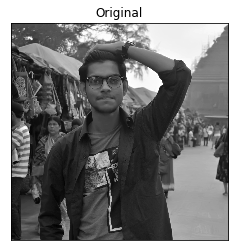

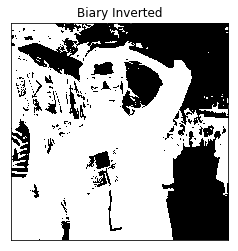

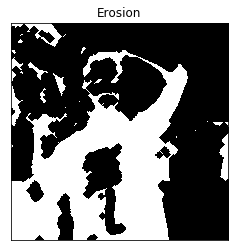

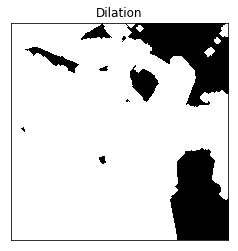

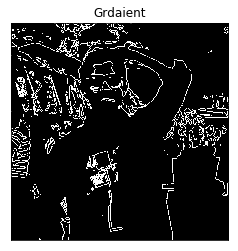

In [2]:
#Morphological Operations
#Otsu's Binarization Thresholding
path="C:\\Users\\ARIJIT ROYCHAUDHURY\\Downloads\\misc\\misc\\SONU.jpg"
#imgpath="C:\\Users\\ARIJIT ROYCHAUDHURY\\Downloads\\misc\\misc\\america.jpeg"
#img1=cv2.imread(imgpath,1)
img=cv2.imread(path,0)
th=127
max_val=255
#k=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
#k=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
k=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
#img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#ret,o1= cv2.threshold(img,th,max_val,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,o2= cv2.threshold(img,th,max_val,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
erosion=cv2.erode(o2,k,iterations=10)
dilation=cv2.dilate(o2,k,iterations=10)
gradient=cv2.morphologyEx(o2,cv2.MORPH_GRADIENT,k)#DIFFERENCE BETWEEN TEH EROSION AND DILATION
#ret,o3= cv2.threshold(img,th,max_val,cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
#ret,o4= cv2.threshold(img,th,max_val,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
#ret,o5= cv2.threshold(img,th,max_val,cv2.THRESH_TRUNC+cv2.THRESH_OTSU)
op=[img,o2,erosion,dilation,gradient]
titles=["Original","Biary Inverted","Erosion","Dilation","Grdaient"]
for i in range(5):
    plt.imshow(op[i],cmap="gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.show()
#cv2.imshow("OUTPUT",op)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.imshow("Monkey",img)
#cv2.imwrite(outpath,img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [5]:
#Detect Motion
windowName="General"
cv2.namedWindow(windowName)
cap=cv2.VideoCapture(0)
w=800
h=600
cap.set(3,w)
cap.set(4,h)
if cap.isOpened():
    ret,frame=cap.read()
else:
    ret=false
ret,frame1=cap.read()
ret,frame2=cap.read()
while ret:
    d=cv2.absdiff(frame1,frame2)
    gray=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    ret,th=cv2.threshold(blur,20,255,cv2.THRESH_BINARY)
    dilated=cv2.dilate(th,np.ones((3,3),np.uint8),iterations=10)
    c,h=cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    frame3 = frame1
    cv2.drawContours(frame1,c,-1,(0,0,255),2)
    cv2.imshow(windowName,frame2)
    cv2.imshow("Intermediate",frame1)
    if(cv2.waitKey(1)==27):
        break
    frame1=frame2
    ret,frame2=cap.read()
cv2.destroyAllWindows()
cap.release()